<a href="https://colab.research.google.com/github/Chajaesik01/research1/blob/main/%EA%B0%9C%EB%B3%84%EC%97%B0%EA%B5%AC%EC%B5%9C%EC%A2%852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 증강시키기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps

#다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
num_augmented_images = 50

In [ ]:
file_path = '/content/drive/MyDrive/image_class/glasses/'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1


for i in range(1, num_augmented_images):
    change_picture_index = random.randrange(1, total_origin_image_num-1)
    #print(change_picture_index)
    #print(file_names[change_picture_index])
    file_name = file_names[change_picture_index]

    origin_image_path = file_path = '/content/drive/MyDrive/image_class/glasses/' + file_name
    print(origin_image_path)
    image = Image.open(origin_image_path)
    for i in range(1, num_augmented_images):
      random_augment = random.randrange(1,4)
    change_picture_index = random.randrange(1, total_origin_image_num-1)
    #print(change_picture_index)
    #print(file_names[change_picture_index])
    file_name = file_names[change_picture_index]

    origin_image_path = file_path = '/content/drive/MyDrive/image_class/glasses/' + file_name
    #print(origin_image_path)
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1,4)

    if(random_augment == 1):
        #이미지 좌우 반전
        #print("invert")
        inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.png')

    elif(random_augment == 2):
        #이미지 기울이기
        #print("rotate")
        rotated_image = image.rotate(random.randrange(-20, 20))
        rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.png')

    elif(random_augment == 3):
        #노이즈 추가하기
        img = cv2.imread(origin_image_path)
        #print("noise")
        row,col,ch= img.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy_array = img + gauss
        noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
        noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.png')

    augment_cnt += 1

noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')

/content/drive/MyDrive/image_class/glasses/img26420.pngrotated_10.png
/content/drive/MyDrive/image_class/glasses/img26416.pnginverted_36.png
/content/drive/MyDrive/image_class/glasses/img26446.pngnoiseAdded_19.png
/content/drive/MyDrive/image_class/glasses/img26413.pngnoiseAdded_29.png
/content/drive/MyDrive/image_class/glasses/img26439.pnginverted_28.png
/content/drive/MyDrive/image_class/glasses/img26407.pngnoiseAdded_44.png
/content/drive/MyDrive/image_class/glasses/img26443.pngrotated_3.png
/content/drive/MyDrive/image_class/glasses/img26423.png
/content/drive/MyDrive/image_class/glasses/img26410.pngnoiseAdded_9.png
/content/drive/MyDrive/image_class/glasses/img26449.pngrotated_13.png
/content/drive/MyDrive/image_class/glasses/img26439.pngnoiseAdded_40.png
/content/drive/MyDrive/image_class/glasses/img26443.pngrotated_4.png
/content/drive/MyDrive/image_class/glasses/img26423.png
/content/drive/MyDrive/image_class/glasses/img26439.pngnoiseAdded_27.png
/content/drive/MyDrive/image_cl

### 사진 데이터 카테고리 분류

In [ ]:
import os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from pathlib import Path
from tqdm import tqdm
from time import perf_counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

In [ ]:
#dir_ = Path('/content/drive/MyDrive/image_data')
filepaths = list(glob.glob('/content/drive/MyDrive/image_class_2/*/*.png'))
def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)

    return df

df = proc_img(filepaths)
df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/image_class_2/hair/4.pn...,hair
1,/content/drive/MyDrive/image_class_2/overcoat/...,overcoat
2,/content/drive/MyDrive/image_class_2/glasses/i...,glasses
3,/content/drive/MyDrive/image_class_2/socks/4.p...,socks
4,/content/drive/MyDrive/image_class_2/glasses/i...,glasses


In [ ]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 570

Number of different labels: 12

Labels: ['hair' 'overcoat' 'glasses' 'socks' 'jewelry' 'skirt' 'shoes' 'top'
 'bottom' 'jumperdress' 'ACC' 'headwear']


In [ ]:
print(f'Number of pictures: 167\n')
print(f'Number of different labels: 12\n')


Number of pictures: 167

Number of different labels: 12



In [ ]:
#train data와 test data로 나누기

train_df,test_df = train_test_split(df, test_size=0.1,random_state=0)
train_df.shape,test_df.shape

((513, 2), (57, 2))

In [ ]:
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/image_class_2',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('/content/drive/MyDrive/image_class_2',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 462 images belonging to 12 classes.
Found 108 images belonging to 12 classes.


In [ ]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=12, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
cnn.fit(x = train_gen, validation_data = val_gen, epochs = 10)

Epoch 1/10
19/19 [==============================] - 274s 14s/step - loss: 2.8022 - accuracy: 0.2123 - val_loss: 2.1746 - val_accuracy: 0.2431
Epoch 2/10
19/19 [==============================] - 2s 88ms/step - loss: 1.5112 - accuracy: 0.5406 - val_loss: 1.7584 - val_accuracy: 0.4306
Epoch 3/10
19/19 [==============================] - 2s 88ms/step - loss: 0.8829 - accuracy: 0.7297 - val_loss: 1.6475 - val_accuracy: 0.5417
Epoch 4/10
19/19 [==============================] - 2s 88ms/step - loss: 0.5877 - accuracy: 0.8209 - val_loss: 1.6719 - val_accuracy: 0.5000
Epoch 5/10
19/19 [==============================] - 2s 123ms/step - loss: 0.4673 - accuracy: 0.8706 - val_loss: 1.6111 - val_accuracy: 0.5278
Epoch 6/10
19/19 [==============================] - 2s 91ms/step - loss: 0.3331 - accuracy: 0.8905 - val_loss: 1.7504 - val_accuracy: 0.5139
Epoch 7/10
19/19 [==============================] - 2s 88ms/step - loss: 0.2762 - accuracy: 0.9104 - val_loss: 1.8413 - val_accuracy: 0.5486
Epoch 8/10


In [ ]:
cnn.save('/content/drive/MyDrive/model')

In [ ]:
from tensorflow import keras
cnn = keras.models.load_model('/content/drive/MyDrive/model')

In [ ]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='categorical', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
import numpy as np
import tensorflow as tf


models = {
    "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "DenseNet201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "EfficientNetB0": {"model":tf.keras.applications.EfficientNetB0, "perf":0},
    "EfficientNetB1": {"model":tf.keras.applications.EfficientNetB1, "perf":0},
    "InceptionV3": {"model":tf.keras.applications.InceptionV3, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "MobileNetV3Large": {"model":tf.keras.applications.MobileNetV3Large, "perf":0},
    "ResNet152V2": {"model":tf.keras.applications.ResNet152V2, "perf":0},
    "ResNet50": {"model":tf.keras.applications.ResNet50, "perf":0},
    "ResNet50V2": {"model":tf.keras.applications.ResNet50V2, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
    "VGG16": {"model":tf.keras.applications.VGG16, "perf":0},
    "Xception": {"model":tf.keras.applications.Xception, "perf":0}
}
# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224,224 , 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(12, activation='softmax')(x)
    # 라벨 개수가 12개이기 때문에 Dencs도 12으로 설정
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Train모델 학습
for name, model in models.items():

    # 전이 학습 모델 가져오기
    m = get_model(model['model'])
    models[name]['model'] = m

    start = perf_counter()

    # 모델 학습
    history = m.fit(train_images,validation_data=val_images,epochs=1,verbose=0)

    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

Found 462 validated image filenames belonging to 12 classes.
Found 51 validated image filenames belonging to 12 classes.
Found 57 validated image filenames belonging to 12 classes.


29084464/29084464 [==============================] - 0s 0us/step
DenseNet121          trained in 91.35 sec
9406464/9406464 [==============================] - 0s 0us/step
MobileNetV2          trained in 23.08 sec
74836368/74836368 [==============================] - 0s 0us/step
DenseNet201          trained in 97.23 sec
16705208/16705208 [==============================] - 0s 0us/step
EfficientNetB0       trained in 46.99 sec
27018416/27018416 [==============================] - 0s 0us/step


EfficientNetB1       trained in 49.91 sec
87910968/87910968 [==============================] - 1s 0us/step


InceptionV3          trained in 46.22 sec
12683000/12683000 [==============================] - 0s 0us/step
MobileNetV3Large     trained in 14.48 sec
234545216/234545216 [==============================] - 2s 0us/step
ResNet152V2          trained in 170.06 sec
94765736/94765736 [==============================] - 1s 0us/step
ResNet50             trained in 66.28 sec
94668760/94668760 [==============================] - 1s 0us/step
ResNet50V2           trained in 84.78 sec
80134624/80134624 [==============================] - 0s 0us/step
VGG19                trained in 271.32 sec
58889256/58889256 [==============================] - 1s 0us/step
VGG16                trained in 201.69 sec
83683744/83683744 [==============================] - 0s 0us/step
Xception             trained in 77.79 sec


In [ ]:
import numpy as np
import tensorflow as tf


models = {
    "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "DenseNet201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "EfficientNetB0": {"model":tf.keras.applications.EfficientNetB0, "perf":0},
    "EfficientNetB1": {"model":tf.keras.applications.EfficientNetB1, "perf":0},
    "InceptionV3": {"model":tf.keras.applications.InceptionV3, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "MobileNetV3Large": {"model":tf.keras.applications.MobileNetV3Large, "perf":0},
    "ResNet152V2": {"model":tf.keras.applications.ResNet152V2, "perf":0},
    "ResNet50": {"model":tf.keras.applications.ResNet50, "perf":0},
    "ResNet50V2": {"model":tf.keras.applications.ResNet50V2, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
    "VGG16": {"model":tf.keras.applications.VGG16, "perf":0},
    "Xception": {"model":tf.keras.applications.Xception, "perf":0}
}
# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224,224 , 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}

    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.

    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(12, activation='softmax')(x)
    # 라벨 개수가 12개이기 때문에 Dencs도 12으로 설정
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Train모델 학습
for name, model in models.items():

    # 전이 학습 모델 가져오기
    m = get_model(model['model'])
    models[name]['model'] = m

    start = perf_counter()

    # 모델 학습
    history = m.fit(train_images,validation_data=val_images,epochs=1,verbose=0)

    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")

    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

Found 462 validated image filenames belonging to 12 classes.
Found 51 validated image filenames belonging to 12 classes.
Found 57 validated image filenames belonging to 12 classes.


DenseNet121          trained in 87.91 sec
MobileNetV2          trained in 23.05 sec
DenseNet201          trained in 151.55 sec
EfficientNetB0       trained in 32.31 sec
EfficientNetB1       trained in 43.54 sec
InceptionV3          trained in 85.81 sec
MobileNetV3Large     trained in 24.38 sec
ResNet152V2          trained in 209.95 sec
ResNet50             trained in 68.79 sec
ResNet50V2           trained in 84.88 sec
VGG19                trained in 276.6 sec
VGG16                trained in 262.87 sec
Xception             trained in 144.46 sec


In [ ]:
# test데이터로 모델 성능 예측
for name, model in models.items():

    # Predict the label of the test_images
    pred = models[name]['model'].predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    y_test = list(test_df.Label)
    acc = accuracy_score(y_test,pred)
    models[name]['acc'] = round(acc,4)
    print(f'**{name} has a {acc * 100:.2f}% accuracy on the test set**')

# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['val_acc'][-1],
                          models[name]['acc'],
                          models[name]['perf']])

df_results = pd.DataFrame(models_result,
                          columns = ['model','val_accuracy','accuracy','Training time (sec)'])
df_results.sort_values(by='accuracy', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

2/2 [==============================] - 8s 3s/step
**DenseNet121 has a 78.95% accuracy on the test set**
2/2 [==============================] - 2s 610ms/step
**MobileNetV2 has a 85.96% accuracy on the test set**
2/2 [==============================] - 13s 4s/step
**DenseNet201 has a 91.23% accuracy on the test set**
2/2 [==============================] - 4s 1s/step
**EfficientNetB0 has a 19.30% accuracy on the test set**


2/2 [==============================] - 6s 2s/step
**EfficientNetB1 has a 17.54% accuracy on the test set**


2/2 [==============================] - 5s 2s/step
**InceptionV3 has a 89.47% accuracy on the test set**
2/2 [==============================] - 3s 693ms/step
**MobileNetV3Large has a 47.37% accuracy on the test set**
2/2 [==============================] - 20s 7s/step
**ResNet152V2 has a 89.47% accuracy on the test set**
2/2 [==============================] - 8s 3s/step
**ResNet50 has a 26.32% accuracy on the test set**
2/2 [==============================] - 7s 3s/step
**ResNet50V2 has a 87.72% accuracy on the test set**
2/2 [==============================] - 29s 13s/step
**VGG19 has a 19.30% accuracy on the test set**
2/2 [==============================] - 24s 10s/step
**VGG16 has a 19.30% accuracy on the test set**
2/2 [==============================] - 9s 4s/step
**Xception has a 82.46% accuracy on the test set**


,model,val_accuracy,accuracy,Training time (sec)
0,DenseNet201,0.9020,0.9123,151.55
1,InceptionV3,0.8235,0.8947,85.81
2,ResNet152V2,0.9412,0.8947,209.95
3,ResNet50V2,0.9020,0.8772,84.88
4,MobileNetV2,0.8039,0.8596,23.05
5,Xception,0.8039,0.8246,144.46
6,DenseNet121,0.8431,0.7895,87.91
7,MobileNetV3Large,0.3725,0.4737,24.38
8,ResNet50,0.2157,0.2632,68.79
9,EfficientNetB0,0.2157,0.1930,32.31


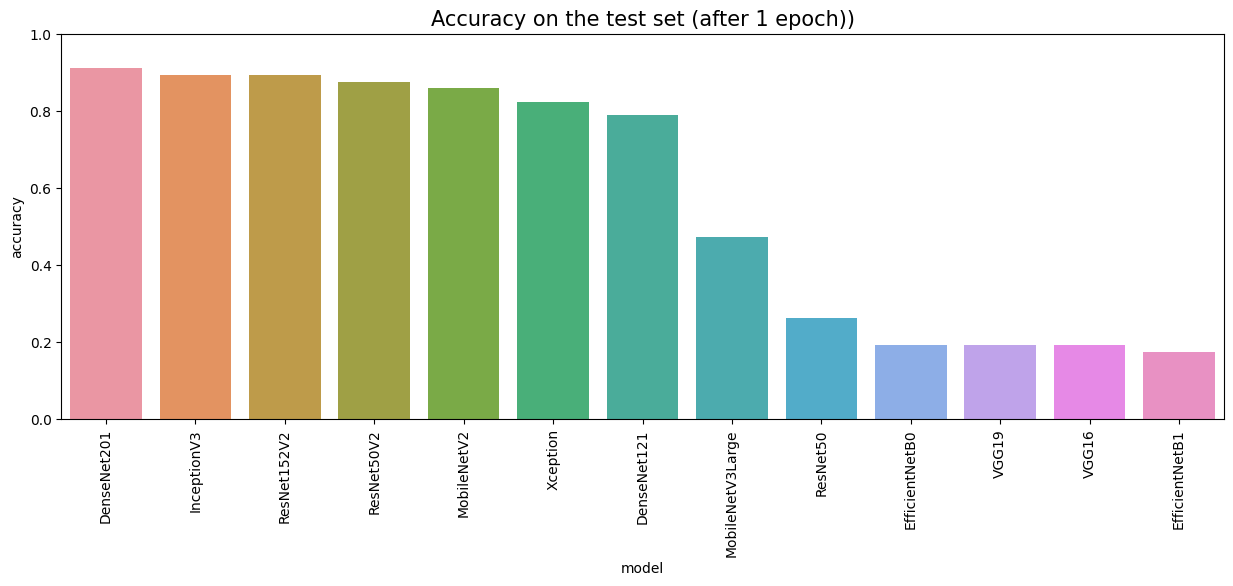

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'accuracy', data = df_results)
plt.title('Accuracy on the test set (after 1 epoch))', fontsize = 15)
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

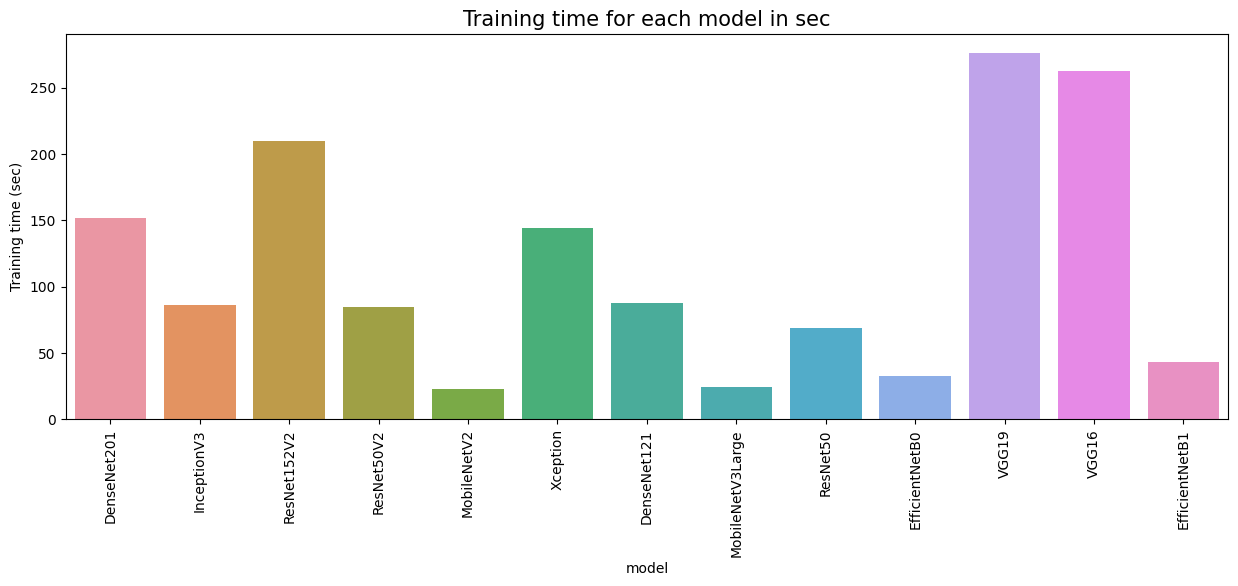

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'Training time (sec)', data = df_results)
plt.title('Training time for each model in sec', fontsize = 15)
# plt.ylim(0,20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.DenseNet201)
history = model.fit(train_images,validation_data=val_images,epochs= 7 ) # ResNet50V2 모델이 7회 반복에서  가장 높은 정확도를 보임

Found 462 validated image filenames belonging to 12 classes.
Found 51 validated image filenames belonging to 12 classes.
Found 57 validated image filenames belonging to 12 classes.
Epoch 1/7
15/15 [==============================] - 103s 6s/step - loss: 1.3900 - accuracy: 0.6537 - val_loss: 0.6891 - val_accuracy: 0.8235
Epoch 2/7
15/15 [==============================] - 88s 6s/step - loss: 0.2583 - accuracy: 0.9589 - val_loss: 0.1977 - val_accuracy: 0.9608
Epoch 3/7
15/15 [==============================] - 87s 6s/step - loss: 0.0743 - accuracy: 0.9870 - val_loss: 0.1014 - val_accuracy: 0.9608
Epoch 4/7
15/15 [==============================] - 86s 6s/step - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 5/7
15/15 [==============================] - 90s 6s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 0.9608
Epoch 6/7
15/15 [==============================] - 87s 6s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0392 - val_a

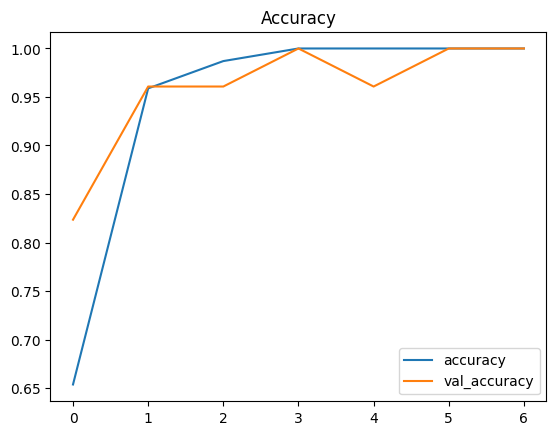

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

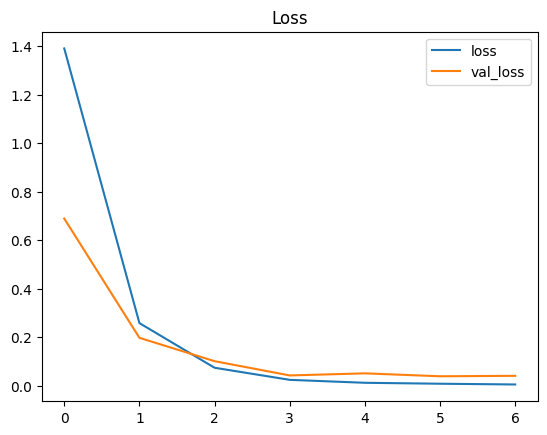

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

2/2 [==============================] - 17s 8s/step
Accuracy on the test set: 98.25%


In [ ]:
model.save('/content/drive/MyDrive/new_model3') # 모두 224, 224으로 설정

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/new_model3') # 모두 224, 224으로 설정

In [ ]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report) # 모두 224, 224으로 설정 DenseNet201 모델

              precision    recall  f1-score   support

         ACC       1.00      1.00      1.00         2
      bottom       1.00      1.00      1.00         5
     glasses       1.00      1.00      1.00        11
        hair       1.00      1.00      1.00         8
    headwear       1.00      1.00      1.00         1
     jewelry       1.00      1.00      1.00         4
 jumperdress       1.00      0.50      0.67         2
    overcoat       0.80      1.00      0.89         4
       shoes       1.00      1.00      1.00         7
       skirt       1.00      1.00      1.00         6
       socks       1.00      1.00      1.00         2
         top       1.00      1.00      1.00         5

    accuracy                           0.98        57
   macro avg       0.98      0.96      0.96        57
weighted avg       0.99      0.98      0.98        57



In [ ]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report) # 모두 150,150으로 설정 DenseNet201 모델

              precision    recall  f1-score   support

         ACC       0.67      1.00      0.80         2
      bottom       1.00      0.20      0.33         5
     glasses       1.00      1.00      1.00        11
        hair       1.00      1.00      1.00         8
    headwear       1.00      0.00      0.00         1
     jewelry       1.00      1.00      1.00         4
 jumperdress       1.00      0.00      0.00         2
    overcoat       0.40      1.00      0.57         4
       shoes       1.00      1.00      1.00         7
       skirt       1.00      1.00      1.00         6
       socks       0.67      1.00      0.80         2
         top       1.00      0.80      0.89         5

    accuracy                           0.86        57
   macro avg       0.89      0.75      0.70        57
weighted avg       0.93      0.86      0.84        57



1/1 [==============================] - 4s 4s/step
## 예측률 : 99.74%
### Class prediction = ACC


"\nLabels: ['bottom' 'top' 'jewelry' 'socks' 'headwear' 'shoes' 'ACC' 'jumperdress'\n 'glasses' 'overcoat' ' skirt' 'hair']\n "

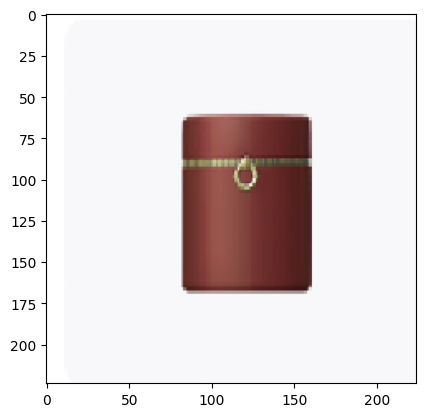

In [ ]:
# from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input


class_dictionary = {'ACC': 0,
                    'bottom': 1,
                    'glasses': 2,
                    'hair': 3,
                    'headwear': 4,
                    'jewelry': 5,
                    'jumperdress': 6,
                    'overcoat': 7,
                    'shoes':8,
                    'skirt':9,
                    'socks':10,
                    "top":11
                    }
Labels: ['shoes' 'headwear' 'ACC' 'top' 'skirt' 'jumperdress' 'bottom' 'glasses'
 'socks' 'hair' 'jewelry']

IMAGE_SIZE    = (224, 224)
test_image = image.load_img( '/content/drive/MyDrive/class_testcase/ACC_12.png'
                            ,target_size =IMAGE_SIZE )

test_image = image.img_to_array(test_image)
plt.imshow(test_image/255.);

test_image = test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image = preprocess_input(test_image)
prediction = model.predict(test_image)

df = pd.DataFrame({'pred':prediction[0]})
df = df.sort_values(by='pred', ascending=False, na_position='first')
print(f"## 예측률 : {(df.iloc[0]['pred'])* 100:.2f}%")

for x in class_dictionary:
  if class_dictionary[x] == (df[df == df.iloc[0]].index[0]):
    categori = x
    print(f"### Class prediction = {x}")
    break

#print(categori)
'''
Labels: ['bottom' 'top' 'jewelry' 'socks' 'headwear' 'shoes' 'ACC' 'jumperdress'
 'glasses' 'overcoat' ' skirt' 'hair']
 '''

히스토그램을 이용한 유사도 측정

### 이미지 유사도 판별 코드

In [ ]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

In [ ]:
import cv2
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image 시각화
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.grid(False)
    im1.imshow(img)
    im1.set_title("Image")

    # Histogram 시각화
    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')     # OpenCV에서는 RGB를 BGR로 쓴다.
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])
        # 채널 색상과 맞춰 그래프를 그린다.
        im2.plot(histr,color = col)
    im2.grid(False)
    im2.set_title("Histogram")

In [ ]:
print(categori)

ACC


In [ ]:
# train_file_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/data/'+shoes') #비교 대상 파일이 있는 폴더
train_file_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/data/'+categori+'/') #위에서 얻은 categori 값 활용
#print(train_file_path)
#images_dir_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/image_data/test/shoes') # 비교할 '사진'이 있는 폴더
images_dir_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/class_testcase/')

In [ ]:
import cv2
import numpy as np
import os

def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 가져오자.
    #path = images_dir_path
    path = train_file_path
    file_list = os.listdir(path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(train_file_path, file_name)
        image = cv2.imread(file_path)
        histogram = get_histogram(image)
        histogram_db[file_name] = histogram

    return histogram_db

def search(histogram_db, target_histogram, top_k=10):
    results = {}

    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        #입력 이미지와 검색 대상 이미지 각각의 히스토그램 간 유사도를 계산
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)

        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results


def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):

        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

def get_target_histogram(Input_name):
    if Input_name not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[Input_name]

def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):
        img_path = os.path.join(train_file_path, filename)

        im = f.add_subplot(1,len(result),idx+1)
        im.grid(False)

        img = Image.open(img_path)
        im.imshow(img)


파일명 입력 : ACC_12.png


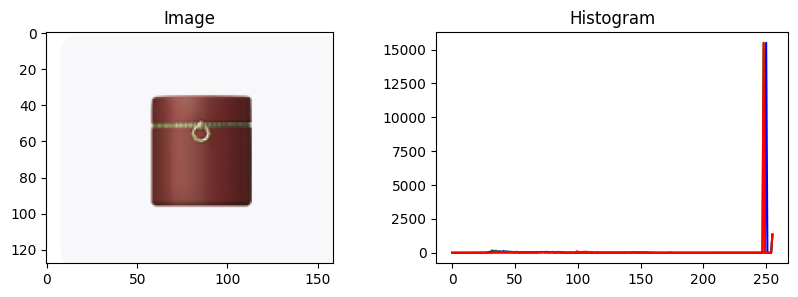

In [ ]:
Input_name = input("파일명 입력 : ")
draw_color_histogram_from_image(Input_name) #images_dir_path에서 위에서 입력한 파일의 이름을 입력값으로 불러온다.

In [ ]:
import shutil


#source_path = '/content/drive/MyDrive/image_data/test/shoes/1228x28.png'
#source_path = '/content/drive/MyDrive/image_data/test/shoes/'+Input_name
source_path = '/content/drive/MyDrive/class_testcase/'+Input_name


#destination_path = '/content/drive/MyDrive/data/shoes/1228x28.png'
#destination_path = '/content/drive/MyDrive/data/shoes/'+Input_name
destination_path = '/content/drive/MyDrive/data/'+categori+'/'+Input_name

shutil.copyfile(source_path, destination_path) # data 폴더에 이미지 복사 저장
print("Image copied successfully!")

Image copied successfully!


In [ ]:
# build_histogram_db()를 만들어서 이미지 파일의 histogram으로 db를 만들어주자.
histogram_db = build_histogram_db()
histogram_db[Input_name]

100%|██████████| 2601/2601 [00:37<00:00, 70.19it/s] 


array([[7.7672631e-02],
       [3.3061523e-02],
       [5.6734793e-03],
       [5.7089382e-01],
       [6.9331266e-02],
       [3.9309107e-02],
       [7.4295560e-03],
       [5.7123154e-01],
       [4.0524852e-04],
       [7.2471946e-02],
       [4.2449784e-02],
       [5.7197452e-01]], dtype=float32)

In [ ]:
# target_histogram에 입력받은 이미지를 히스토그램으로 저장하는 함수
target_histogram = get_target_histogram(Input_name)
target_histogram

array([[7.7672631e-02],
       [3.3061523e-02],
       [5.6734793e-03],
       [5.7089382e-01],
       [6.9331266e-02],
       [3.9309107e-02],
       [7.4295560e-03],
       [5.7123154e-01],
       [4.0524852e-04],
       [7.2471946e-02],
       [4.2449784e-02],
       [5.7197452e-01]], dtype=float32)

In [ ]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 2601/2601 [00:00<00:00, 394210.62it/s]


{'ACC_12.png': 0.0,
 'img0471228x28.png': 0.045215696160482,
 'img0292628x28.png': 0.14719314103524272,
 'img0940828x28.png': 0.23674849583571472,
 'img0854928x28.png': 0.24025134620017322,
 'img0426228x28.png': 0.24488407199717935,
 'img0274628x28.png': 0.27550677941076207,
 'img0316428x28.png': 0.28023728258658603,
 'img0540528x28.png': 0.2858652461630909,
 'img0275328x28.png': 0.28753742950467187}

{'ACC_12.png': 0.0, 'img0471228x28.png': 0.045215696160482, 'img0292628x28.png': 0.14719314103524272, 'img0940828x28.png': 0.23674849583571472, 'img0854928x28.png': 0.24025134620017322, 'img0426228x28.png': 0.24488407199717935, 'img0274628x28.png': 0.27550677941076207, 'img0316428x28.png': 0.28023728258658603, 'img0540528x28.png': 0.2858652461630909, 'img0275328x28.png': 0.28753742950467187}


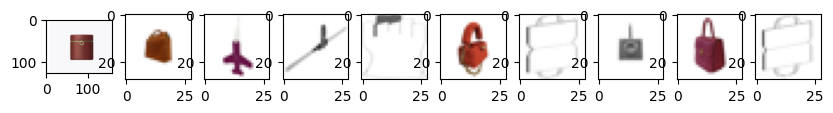

In [ ]:
target_histogram = get_target_histogram(Input_name)
#result = search(histogram_db, target_histogram)

print(result) #히스토그램 거리값 출력, 0에 가까울 수록 유사도가 높다고 판단
show_result(result)

{'bottom1.png': 0.0, 'img28234.png': 0.012147090154467067, 'img26644.png': 0.015157353856947078, 'img28796.png': 0.0226873087522541, 'img27966.png': 0.026356862897180183, 'img28685.png': 0.02674937365274507, 'img28760.png': 0.030055108176800613, 'img28551.png': 0.03035604514388566, 'img26481.png': 0.03419830403154776, 'img30187.png': 0.03428101403933387}


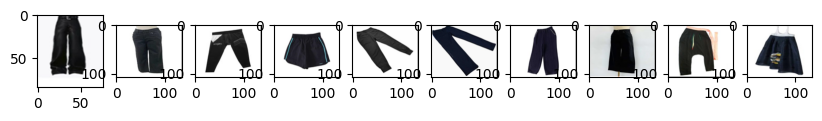

In [ ]:
target_histogram = get_target_histogram(Input_name)
#result = search(histogram_db, target_histogram)

print(result) #히스토그램 거리값 출력, 0에 가까울 수록 유사도가 높다고 판단
show_result(result)

{'top1.png': 0.0, 'img09403.png': 0.008928906706718535, 'img08861.png': 0.011230164678194623, 'img08992.png': 0.01390228835292986, 'img08064.png': 0.013906760437739425, 'img14873.png': 0.0139074944921552, 'img08701.png': 0.013986968757877144, 'img09005.png': 0.014573501107211558, 'img08355.png': 0.014779949452524376, 'img08959.png': 0.015370354182801018}


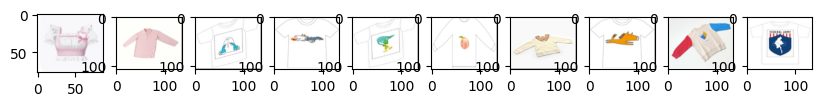

In [ ]:
target_histogram = get_target_histogram(Input_name)
#result = search(histogram_db, target_histogram)

print(result) #히스토그램 거리값 출력, 0에 가까울 수록 유사도가 높다고 판단
show_result(result)

{'jumperdress3.png': 0.0, '12.png': 0.781954207600398, 'img01093.png': 1.0267275752582847, 'img31477.png': 1.0308396282444554, 'img01057.png': 1.034691341922798, 'img01086.png': 1.0422599214591661, 'img31490.png': 1.0453304992788424, 'img31898.png': 1.0464261909724863, 'img32587.png': 1.0557270337648288, 'img32724.png': 1.0559023430856647}


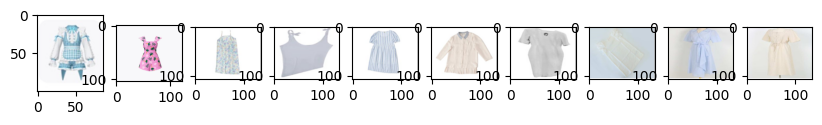

In [ ]:
target_histogram = get_target_histogram(Input_name)
#result = search(histogram_db, target_histogram)

print(result) #히스토그램 거리값 출력, 0에 가까울 수록 유사도가 높다고 판단
show_result(result)

In [ ]:
os.remove(destination_path) # 입력 이미지 삭제

In [ ]:
'''
import cv2
import os

# Assuming you have defined the necessary variables:
# images_dir_path: path to the directory containing the images
# file_path: path to the image file
images_dir_path = '/content/drive/MyDrive/image_data/test/shoes'
file_path = '/content/drive/MyDrive/image_data/test/shoes/16_500.png'
# Read the image using OpenCV
image = cv2.imread(file_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram using cv2.calcHist()
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Normalize the histogram
cv2.normalize(histogram, histogram, 0, 1, cv2.NORM_MINMAX)

# Print the histogram
#print(histogram)
'''
